In [1]:
from random import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from RandomForest import RandomForest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Untuk Membaca data dari host file
file_path = "../Progress_Proposal_THT/tht_transform_featureranking_sbs.xlsx"
df = pd.read_excel(file_path)

In [3]:
df.head()

,nyeri_membuka_mulut,vertigo,hidung_nyeri,blkng_hidng_ganjal,leher_bengkak,telinga_kemerahan,hidung_kemerahan,hidung_bengkak,telinga_gatal,tenggorokan_gatal,...,pandangan,mata_juling,nafsu_makan,pipi_bengkak,pipi_nyeri,badan_lemas,berat_badan,mual,muntah,hasil_diagn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tonsilitsakut
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tonsilitsakut
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tonsilitsakut
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tonsilitsakut
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,tonsilitsakut


In [4]:
df["hasil_diagn"].value_counts()

hasil_diagn
laringitisakut            33
tonsilitsakut             32
rhinitis_alergi           32
serumen_obsturans         32
faringitis_akut           31
ruptur_membran_timpani    30
othematome                30
parotitis                 30
laringofaringealreflux    30
karsinoma_nasofaring      30
korpus_alenium_hidung     30
prebiakusis               30
barotrauma                30
bppv                      30
otisis_media_kronis       30
rhinitis_akut             30
meniere_disease           30
vestibulitis              30
perichondritis            30
sinusitis                 30
otisis_eksterna           30
otisis_media_akut         30
karsinoma_laring          30
Name: count, dtype: int64

In [5]:
df["hasil_diagn"].value_counts().sum()

700

In [6]:
# Drop rows with missing values
df.dropna(axis=0, inplace=True)

In [7]:
#VISUALISASI
vis_df = pd.read_excel(file_path)
vis_df.columns = ['nyeri membuka mulut', 'vertigo', 'hidung nyeri', 
                  'belakang hidung ganjal', 'leher bengkak',
                  'telinga kemerahan', 'hidung kemerahan', 'hidung bengkak', 'telinga gatal',
                  'tenggorokan gatal', 'kepala berat', 'telinga berat', 'gendang telinga lubang',
                  'telinga berair/kemasukan_air', 'mimisan',
                  'tenggorokan_panas', 'kekentalan_ingus', 'bersendawa', 'berdehem', 'kembung', 'mulut_pahit',
                  'mulut_bau', 'mulut_kering', 'pandangan', 'mata_juling', 'nafsu_makan', 'pipi_bengkak', 'pipi_nyeri', 'badan_lemas', 'berat_badan', 
                  'mual', 'muntah',
                  'Diagnosis']

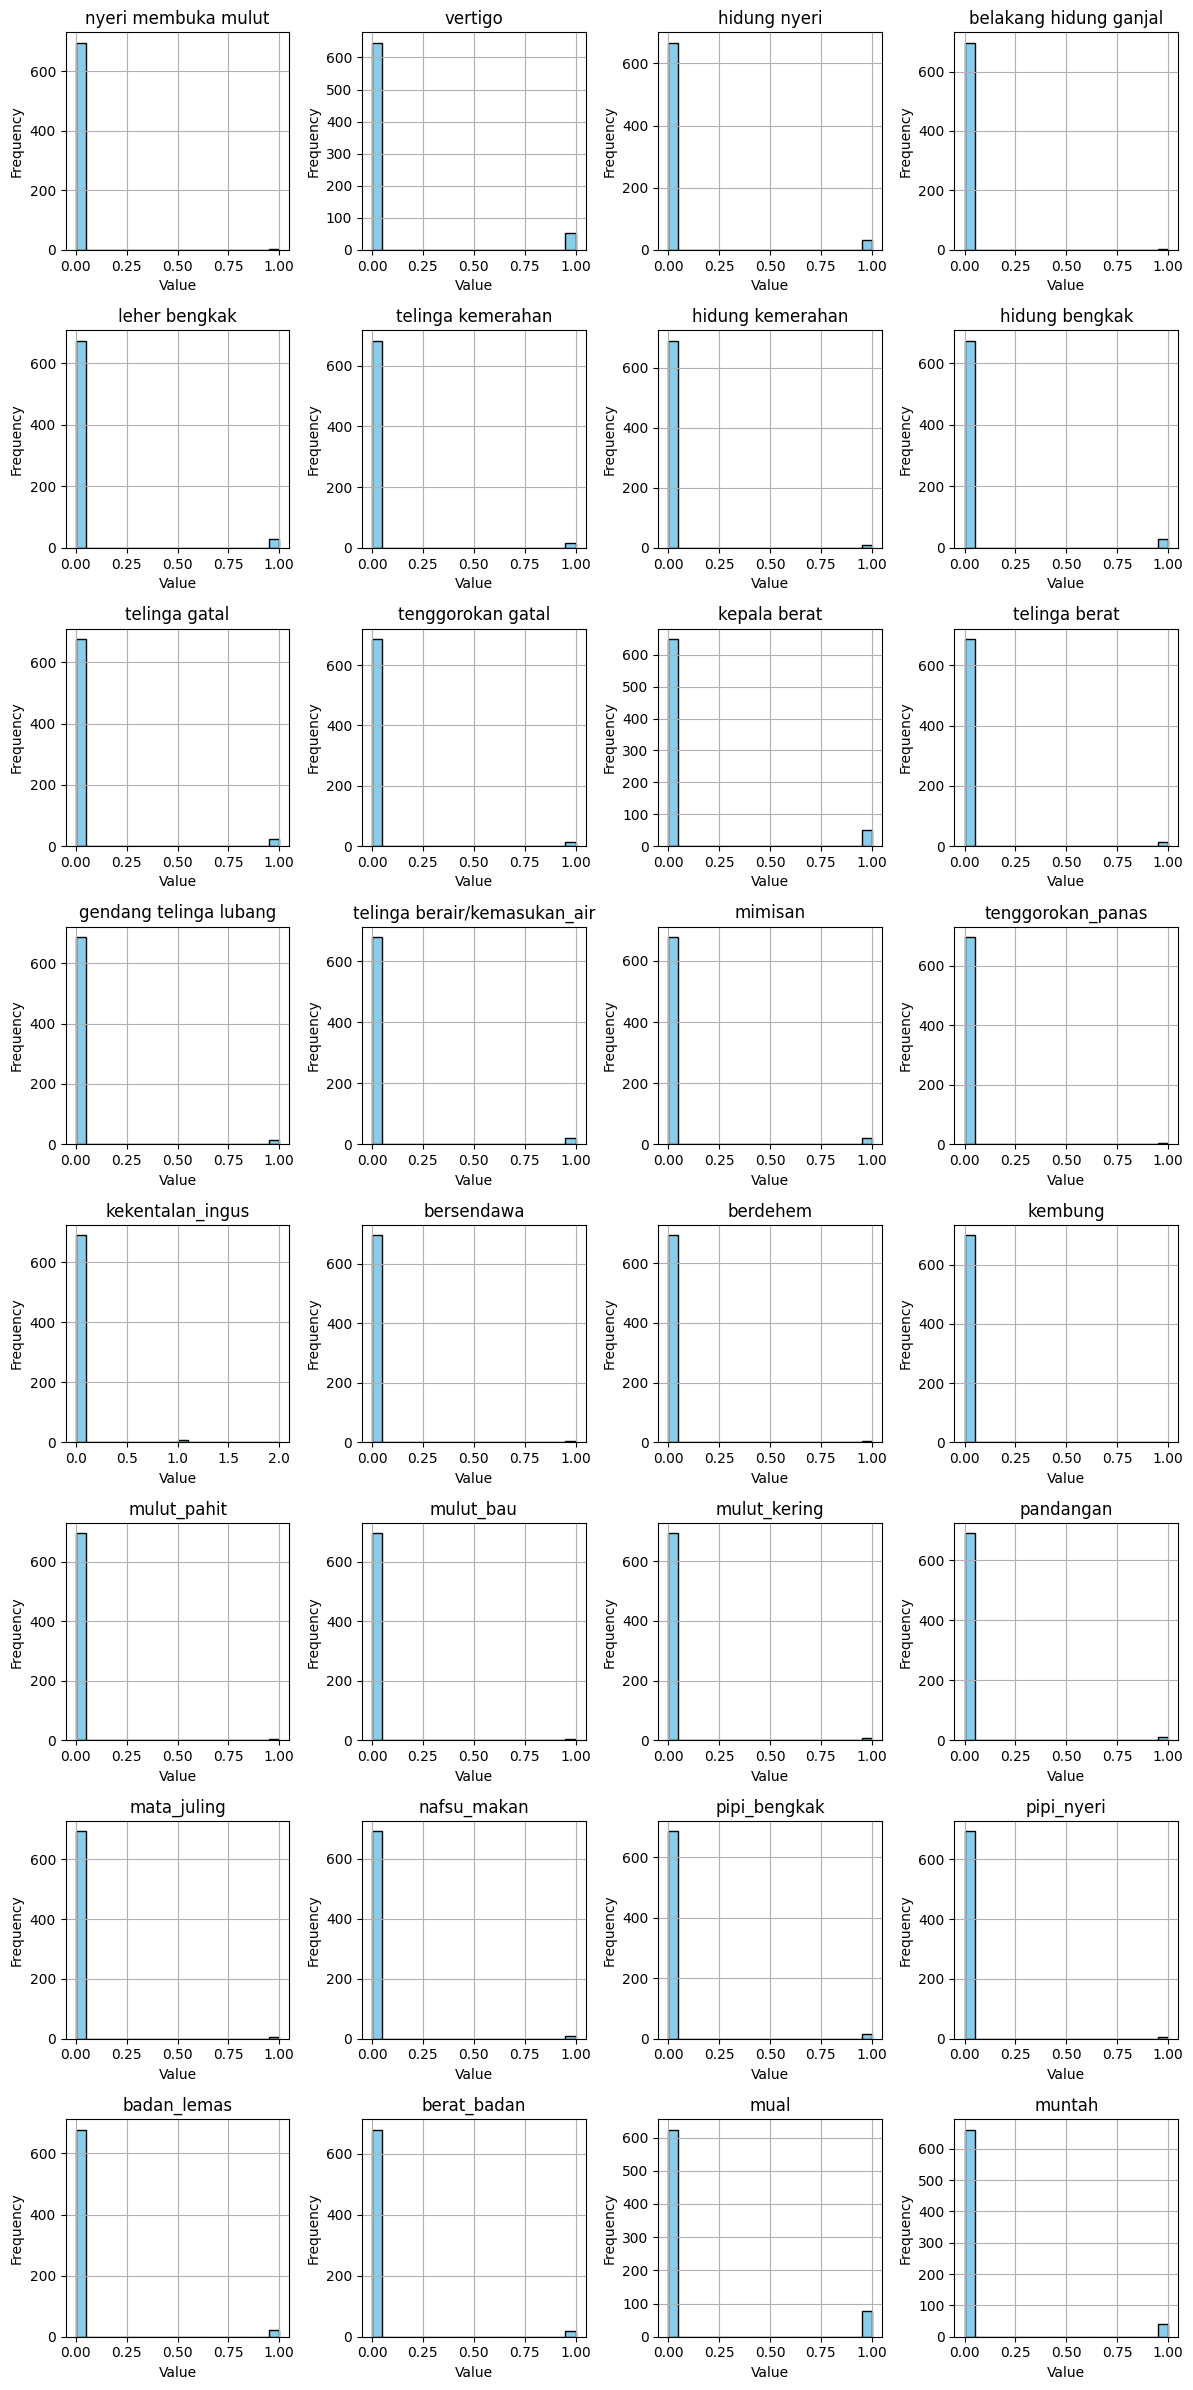

In [8]:
# List of feature columns
feature_columns = vis_df.columns[:-1]  # tidak memakai kolom terakhir karena diagnosis

# Calculate the number of rows and columns for subplots
num_features = len(feature_columns)
num_rows = (num_features + 3) // 4  # Calculate the number of rows (ceil(num_features / 4))
num_cols = min(num_features, 4)     # Number of columns is at most 4

# Plotting the distribution of each feature
plt.figure(figsize=(12, 3 * num_rows))

for i, feature in enumerate(feature_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Adjust the subplot layout as per your number of features
    vis_df[feature].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
missing_values = df.isnull().any()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values].index.tolist())

# Check if there are any missing values in the DataFrame
if missing_values.any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

Columns with missing values:
[]
There are no missing values in the DataFrame.


In [10]:
#1X SAJA
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target labels into numeric values
df['hasil_diagn_encoded'] = label_encoder.fit_transform(df['hasil_diagn'])

# Check the mapping between original labels and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Label Mapping:", label_mapping)

# Now you have a new column 'hasil_diagn_encoded' containing numeric representations of the labels
# You can drop the original 'hasil_diagn' column if you don't need it anymore
df.drop(columns=['hasil_diagn'], inplace=True)

Label Mapping: {'barotrauma': 0, 'bppv': 1, 'faringitis_akut': 2, 'karsinoma_laring': 3, 'karsinoma_nasofaring': 4, 'korpus_alenium_hidung': 5, 'laringitisakut': 6, 'laringofaringealreflux': 7, 'meniere_disease': 8, 'othematome': 9, 'otisis_eksterna': 10, 'otisis_media_akut': 11, 'otisis_media_kronis': 12, 'parotitis': 13, 'perichondritis': 14, 'prebiakusis': 15, 'rhinitis_akut': 16, 'rhinitis_alergi': 17, 'ruptur_membran_timpani': 18, 'serumen_obsturans': 19, 'sinusitis': 20, 'tonsilitsakut': 21, 'vestibulitis': 22}


In [11]:
for key, values in label_mapping.items():
    print(key)

barotrauma
bppv
faringitis_akut
karsinoma_laring
karsinoma_nasofaring
korpus_alenium_hidung
laringitisakut
laringofaringealreflux
meniere_disease
othematome
otisis_eksterna
otisis_media_akut
otisis_media_kronis
parotitis
perichondritis
prebiakusis
rhinitis_akut
rhinitis_alergi
ruptur_membran_timpani
serumen_obsturans
sinusitis
tonsilitsakut
vestibulitis


In [12]:
# Assuming the last column is the label/target column
X = df.drop("hasil_diagn_encoded", axis = 1)  # Features
y = df['hasil_diagn_encoded']   # Labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 #1234
)

In [13]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X, y, test_size=0.4, random_state=42
)


In [14]:
# Splitting the data into training and testing sets while maintaining the same proportion of classes
StratX_train, StratX_test, Straty_train, Straty_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
StratX_train3, StratX_test3, Straty_train3, Straty_test3 = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
StratX_train4, StratX_test4, Straty_train4, Straty_test4 = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

In [15]:
X_test

,nyeri_membuka_mulut,vertigo,hidung_nyeri,blkng_hidng_ganjal,leher_bengkak,telinga_kemerahan,hidung_kemerahan,hidung_bengkak,telinga_gatal,tenggorokan_gatal,...,mulut_kering,pandangan,mata_juling,nafsu_makan,pipi_bengkak,pipi_nyeri,badan_lemas,berat_badan,mual,muntah
158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X2 = df.drop("hasil_diagn_encoded", axis = 1).values  # Features ke np array
y2 = df['hasil_diagn_encoded'].values   # Labels ke np array

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=42 #1234
)

In [17]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X2, y2, test_size=0.3, random_state=42 #1234
)

In [18]:
print("Data Trainning : ", X_train.head())

print("Data Testing :", X_test.head())

Data Trainning :       nyeri_membuka_mulut  vertigo  hidung_nyeri  blkng_hidng_ganjal  \
82                     0        0             0                   0   
51                     0        0             0                   0   
220                    0        0             0                   0   
669                    0        0             0                   0   
545                    0        0             0                   0   

     leher_bengkak  telinga_kemerahan  hidung_kemerahan  hidung_bengkak  \
82               0                  0                 0               0   
51               0                  0                 0               0   
220              0                  0                 0               0   
669              0                  0                 0               0   
545              0                  0                 0               0   

     telinga_gatal  tenggorokan_gatal  ...  mulut_kering  pandangan  \
82               0               

In [19]:
from sklearn.ensemble import RandomForestClassifier
#'max_depth': 21, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 512
forest = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=9, min_samples_leaf=1, max_depth=21, max_features='sqrt')
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.32142857142857145

In [20]:
forest3 = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=9, min_samples_leaf=1, max_depth=21, max_features='sqrt')
forest3.fit(X_train3, y_train3)
forest3.score(X_test3, y_test3)

0.34285714285714286

In [21]:
forest4 = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=9, min_samples_leaf=1, max_depth=21, max_features='sqrt')
forest4.fit(X_train4, y_train4)
forest4.score(X_test4, y_test4)

0.3607142857142857

In [22]:
Stratforest = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=9, min_samples_leaf=1, max_depth=21, max_features='sqrt')
Stratforest.fit(StratX_train, Straty_train)
Stratforest.score(StratX_test, Straty_test)

0.4142857142857143

In [23]:
Stratforest3 = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=9, min_samples_leaf=1, max_depth=21, max_features='sqrt')
Stratforest3.fit(StratX_train3, Straty_train3)
Stratforest3.score(StratX_test3, Straty_test3)

0.38095238095238093

In [24]:
Stratforest4 = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=9, min_samples_leaf=1, max_depth=21, max_features='sqrt')
Stratforest4.fit(StratX_train4, Straty_train4)
Stratforest4.score(StratX_test4, Straty_test4)

0.38571428571428573

In [25]:
y_pred = Stratforest.predict(StratX_test)
print(y_pred)

[ 1 16  8 10 22 17  7 20 21 17 22 20  4  1 17 17 17 17 17  8 17 17 17 17
 17 17 17 17 17  7 17 17  3  8 17 10 17 14 17  1  3 17 17 16 17 17 17  3
 17 17 17  2 17 17 17 20 12 17 17 20  1  1 17 13 17 17 10 17  1  8 22 12
 17  1 16  8  1 17  1 17 17 17 16 22 10  7 12  1 17  3 17 17 16 17  1 17
 22  4 16 10 13 17  1 14 17 17 17 17 17 17 17 17 17 17 14  3 20 17 17 13
 17  7 13 17  4  4  3 17 14  4 14  4 17 17 17 17 22 21 17 17]


In [26]:
y_pred3 = Stratforest3.predict(StratX_test3)

In [27]:
y_pred4 = Stratforest4.predict(StratX_test4)

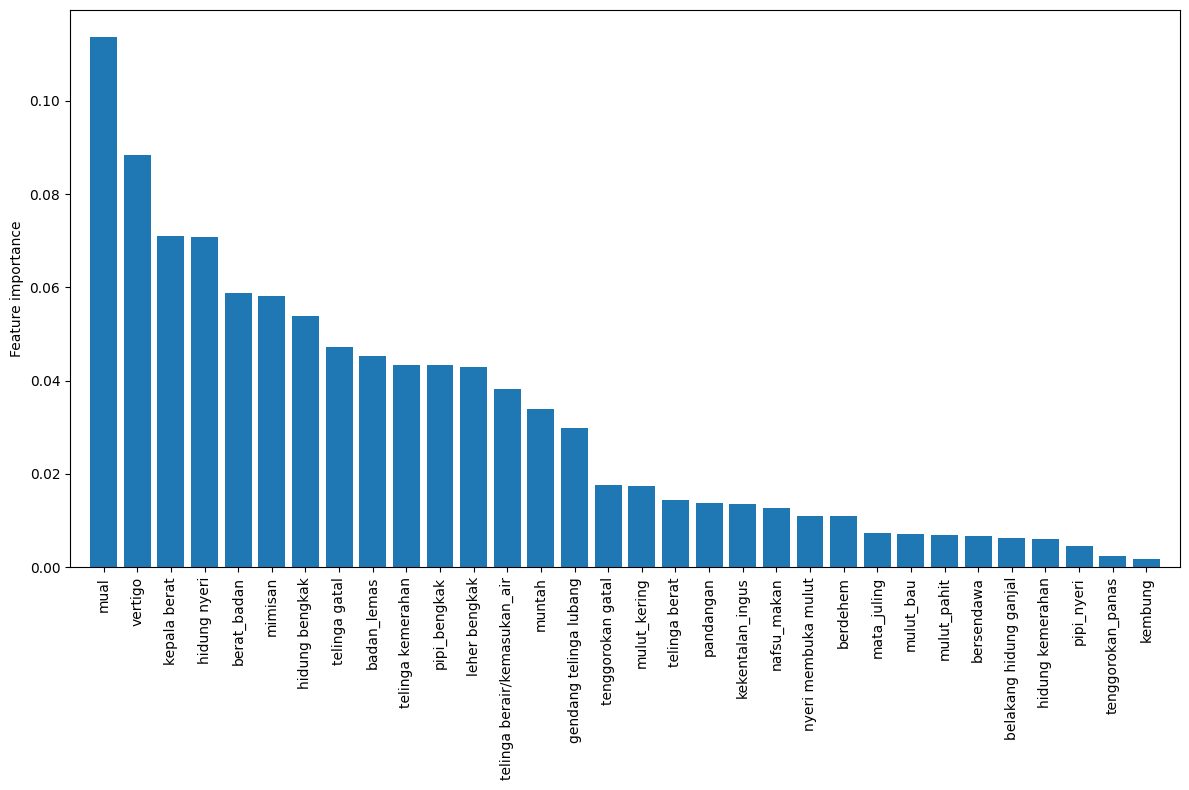

In [28]:
importances = forest.feature_importances_ #mendapatkan prosentasi feature terpenting

plt.figure(figsize=(12, 8))
indices = np.argsort(importances)[::-1] #ascending atas ke bawah 1# tertinggi -> last# terendah
plt.ylabel('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

feat_labels = vis_df.columns[:-1]
plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)

plt.xlim([-1, X_train.shape[1]])

plt.tight_layout()
plt.savefig('feature-importance.pdf', dpi=900)
plt.show()

In [29]:
def confusion_matrix(y_true, y_pred, labels):
    matrix = [[0 for _ in range(len(labels))] for _ in range(len(labels))]
    
    for true, pred in zip(y_true, y_pred):
        matrix[true][pred] += 1
    
    return matrix

def plot_confusion_matrix(matrix, labels):
    print("\nConfusion Matrix:")
    for row in matrix:
        print(row)
    
    print("\nConfusion Matrix (Normalized):")
    total_samples = sum(sum(row) for row in matrix)
    for i, row in enumerate(matrix):
        row_total = sum(row)
        normalized_row = ["{:.2f}".format(val/row_total) if row_total != 0 else "0.00" for val in row]
        print(normalized_row)
    
    print("\nPlotting Confusion Matrix:")
    for i, row in enumerate(matrix):
        for j, val in enumerate(row):
            print(val, end=" ")
        print()

# Calculate confusion matrix
matrix = confusion_matrix(Straty_test3, y_pred3, np.unique(Straty_test3))

# Plot confusion matrix
plot_confusion_matrix(matrix, np.unique(Straty_test3))



Confusion Matrix:
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 1, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0]
[0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 7, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 4, 0, 0, 0, 0, 0]


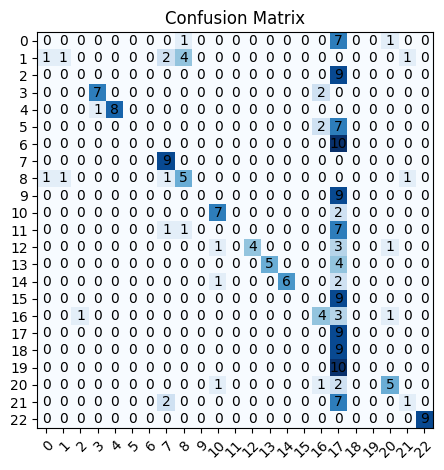

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def confusion_matrix(y_true, y_pred, labels):
    matrix = np.zeros((len(labels), len(labels)))
    
    for true, pred in zip(y_true, y_pred):
        matrix[true][pred] += 1
    
    return matrix

def plot_confusion_matrix(matrix, labels):
    fig, ax = plt.subplots()
    
    # Create heatmap
    im = ax.imshow(matrix, cmap='Blues')
    
    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, "{:.0f}".format(matrix[i, j]), ha="center", va="center", color="black")

    ax.set_title("Confusion Matrix")
    fig.tight_layout()
    plt.show()

# Example usage:
# Calculate confusion matrix
matrix = confusion_matrix(Straty_test3, y_pred3, np.unique(Straty_test3))

# Plot confusion matrix
plot_confusion_matrix(matrix, np.unique(Straty_test3))

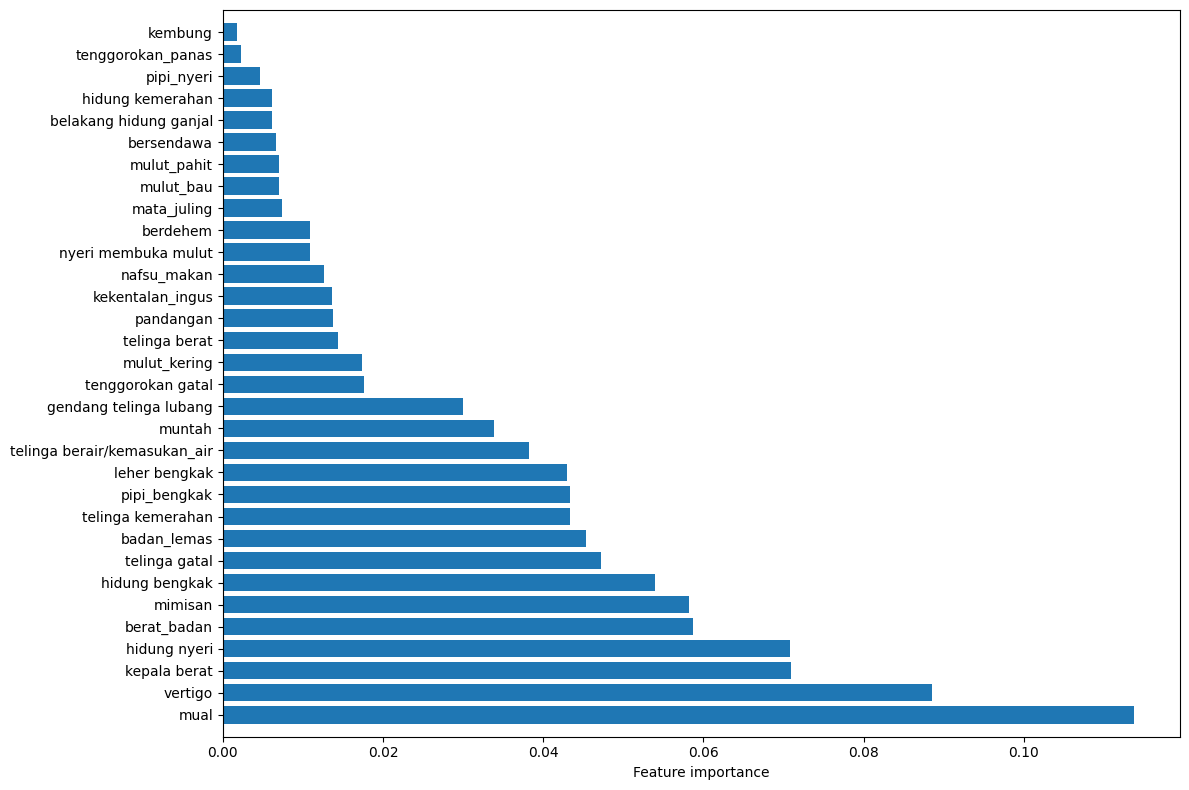

In [31]:
importances3 = Stratforest3.feature_importances_  # Get feature importances

plt.figure(figsize=(12, 8))
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]  # Highest -> Last, Lowest -> First

plt.xlabel('Feature importance')  # Change to xlabel as it's now the feature importance
plt.barh(range(StratX_train3.shape[1]),  # Change to barh for horizontal bar plot
         importances[indices],
         align='center')

feat_labels = vis_df.columns[:-1]
plt.yticks(range(StratX_train3.shape[1]),  # Change to yticks
           feat_labels[indices], rotation=0)  # Rotate labels horizontally

plt.ylim([-1, StratX_train3.shape[1]])  # Change to ylim for y-axis limit

plt.tight_layout()
plt.savefig('feature-importance.pdf', dpi=600)
plt.show()


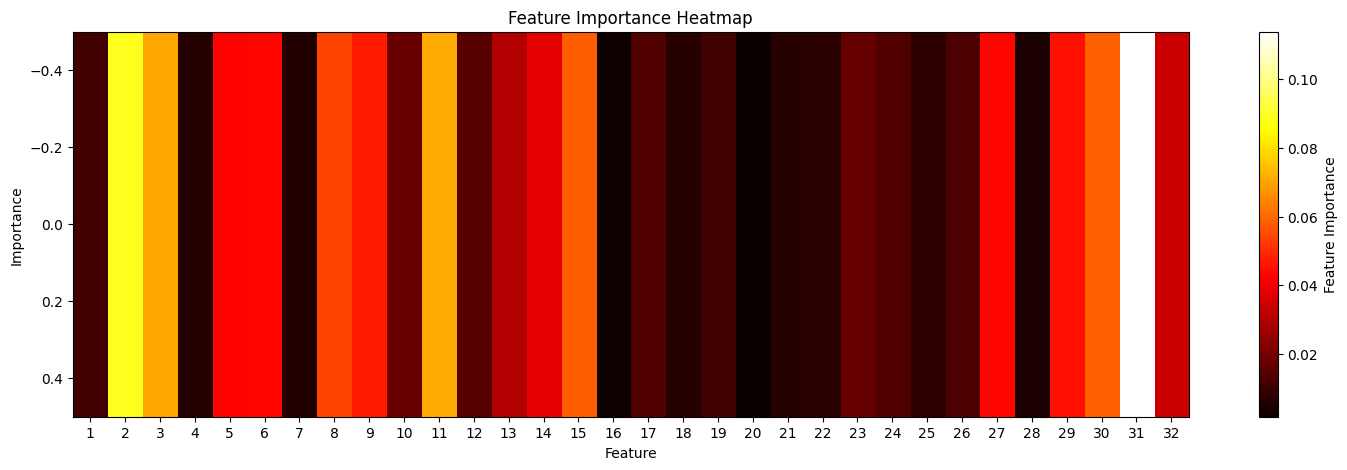

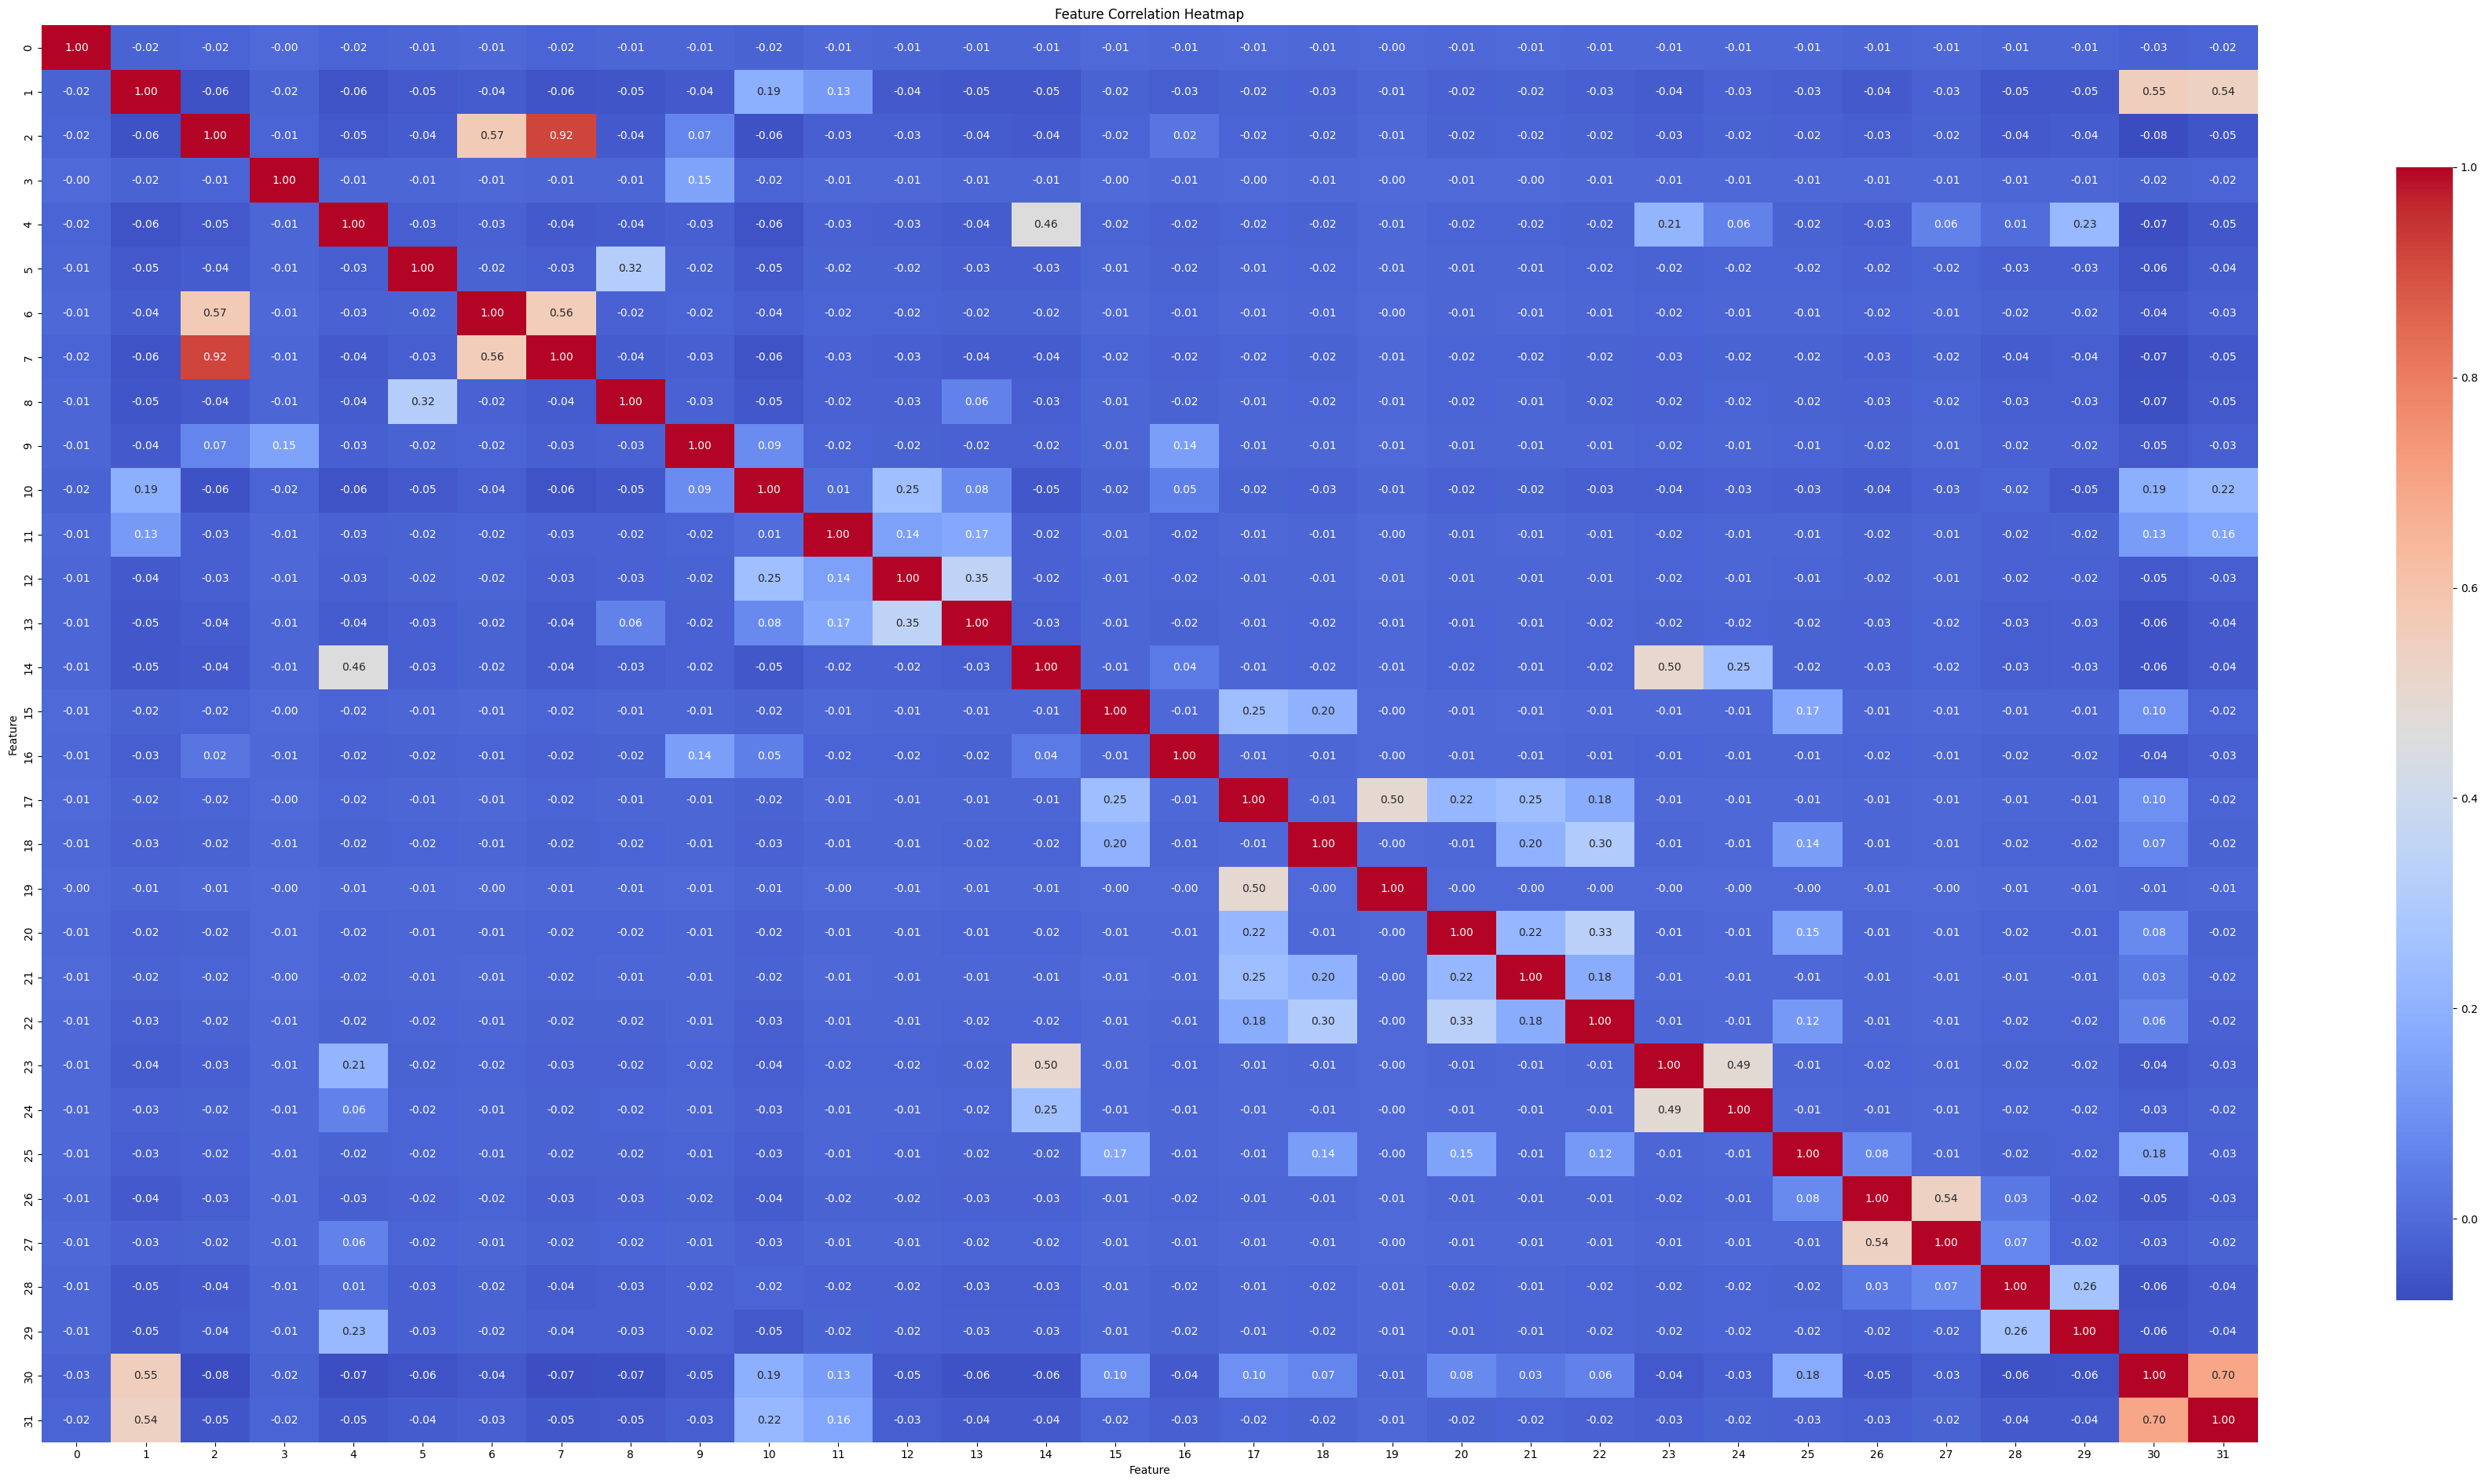

In [32]:
# Reshaping importances for heatmap
importances_heatmap = importances.reshape(1, -1)

indices = np.argsort(importances_heatmap)[::-1]  # Highest -> Last, Lowest -> First
# Plotting heatmap
plt.figure(figsize=(18, 5))
plt.imshow(importances_heatmap, cmap='hot', aspect='auto')
plt.colorbar(label='Feature Importance')
plt.xticks(ticks=np.arange(len(importances)), labels=np.arange(len(importances))+1)
# plt.xticks(range(X_train.shape[1]), 
#            feat_labels[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Heatmap')
plt.show()

correlation_matrix = np.corrcoef(X, rowvar=False)

# Plotting feature correlation heatmap with wider size
plt.figure(figsize=(36, 19))  # Increase the figure width and height
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap')
plt.xlabel('Feature')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

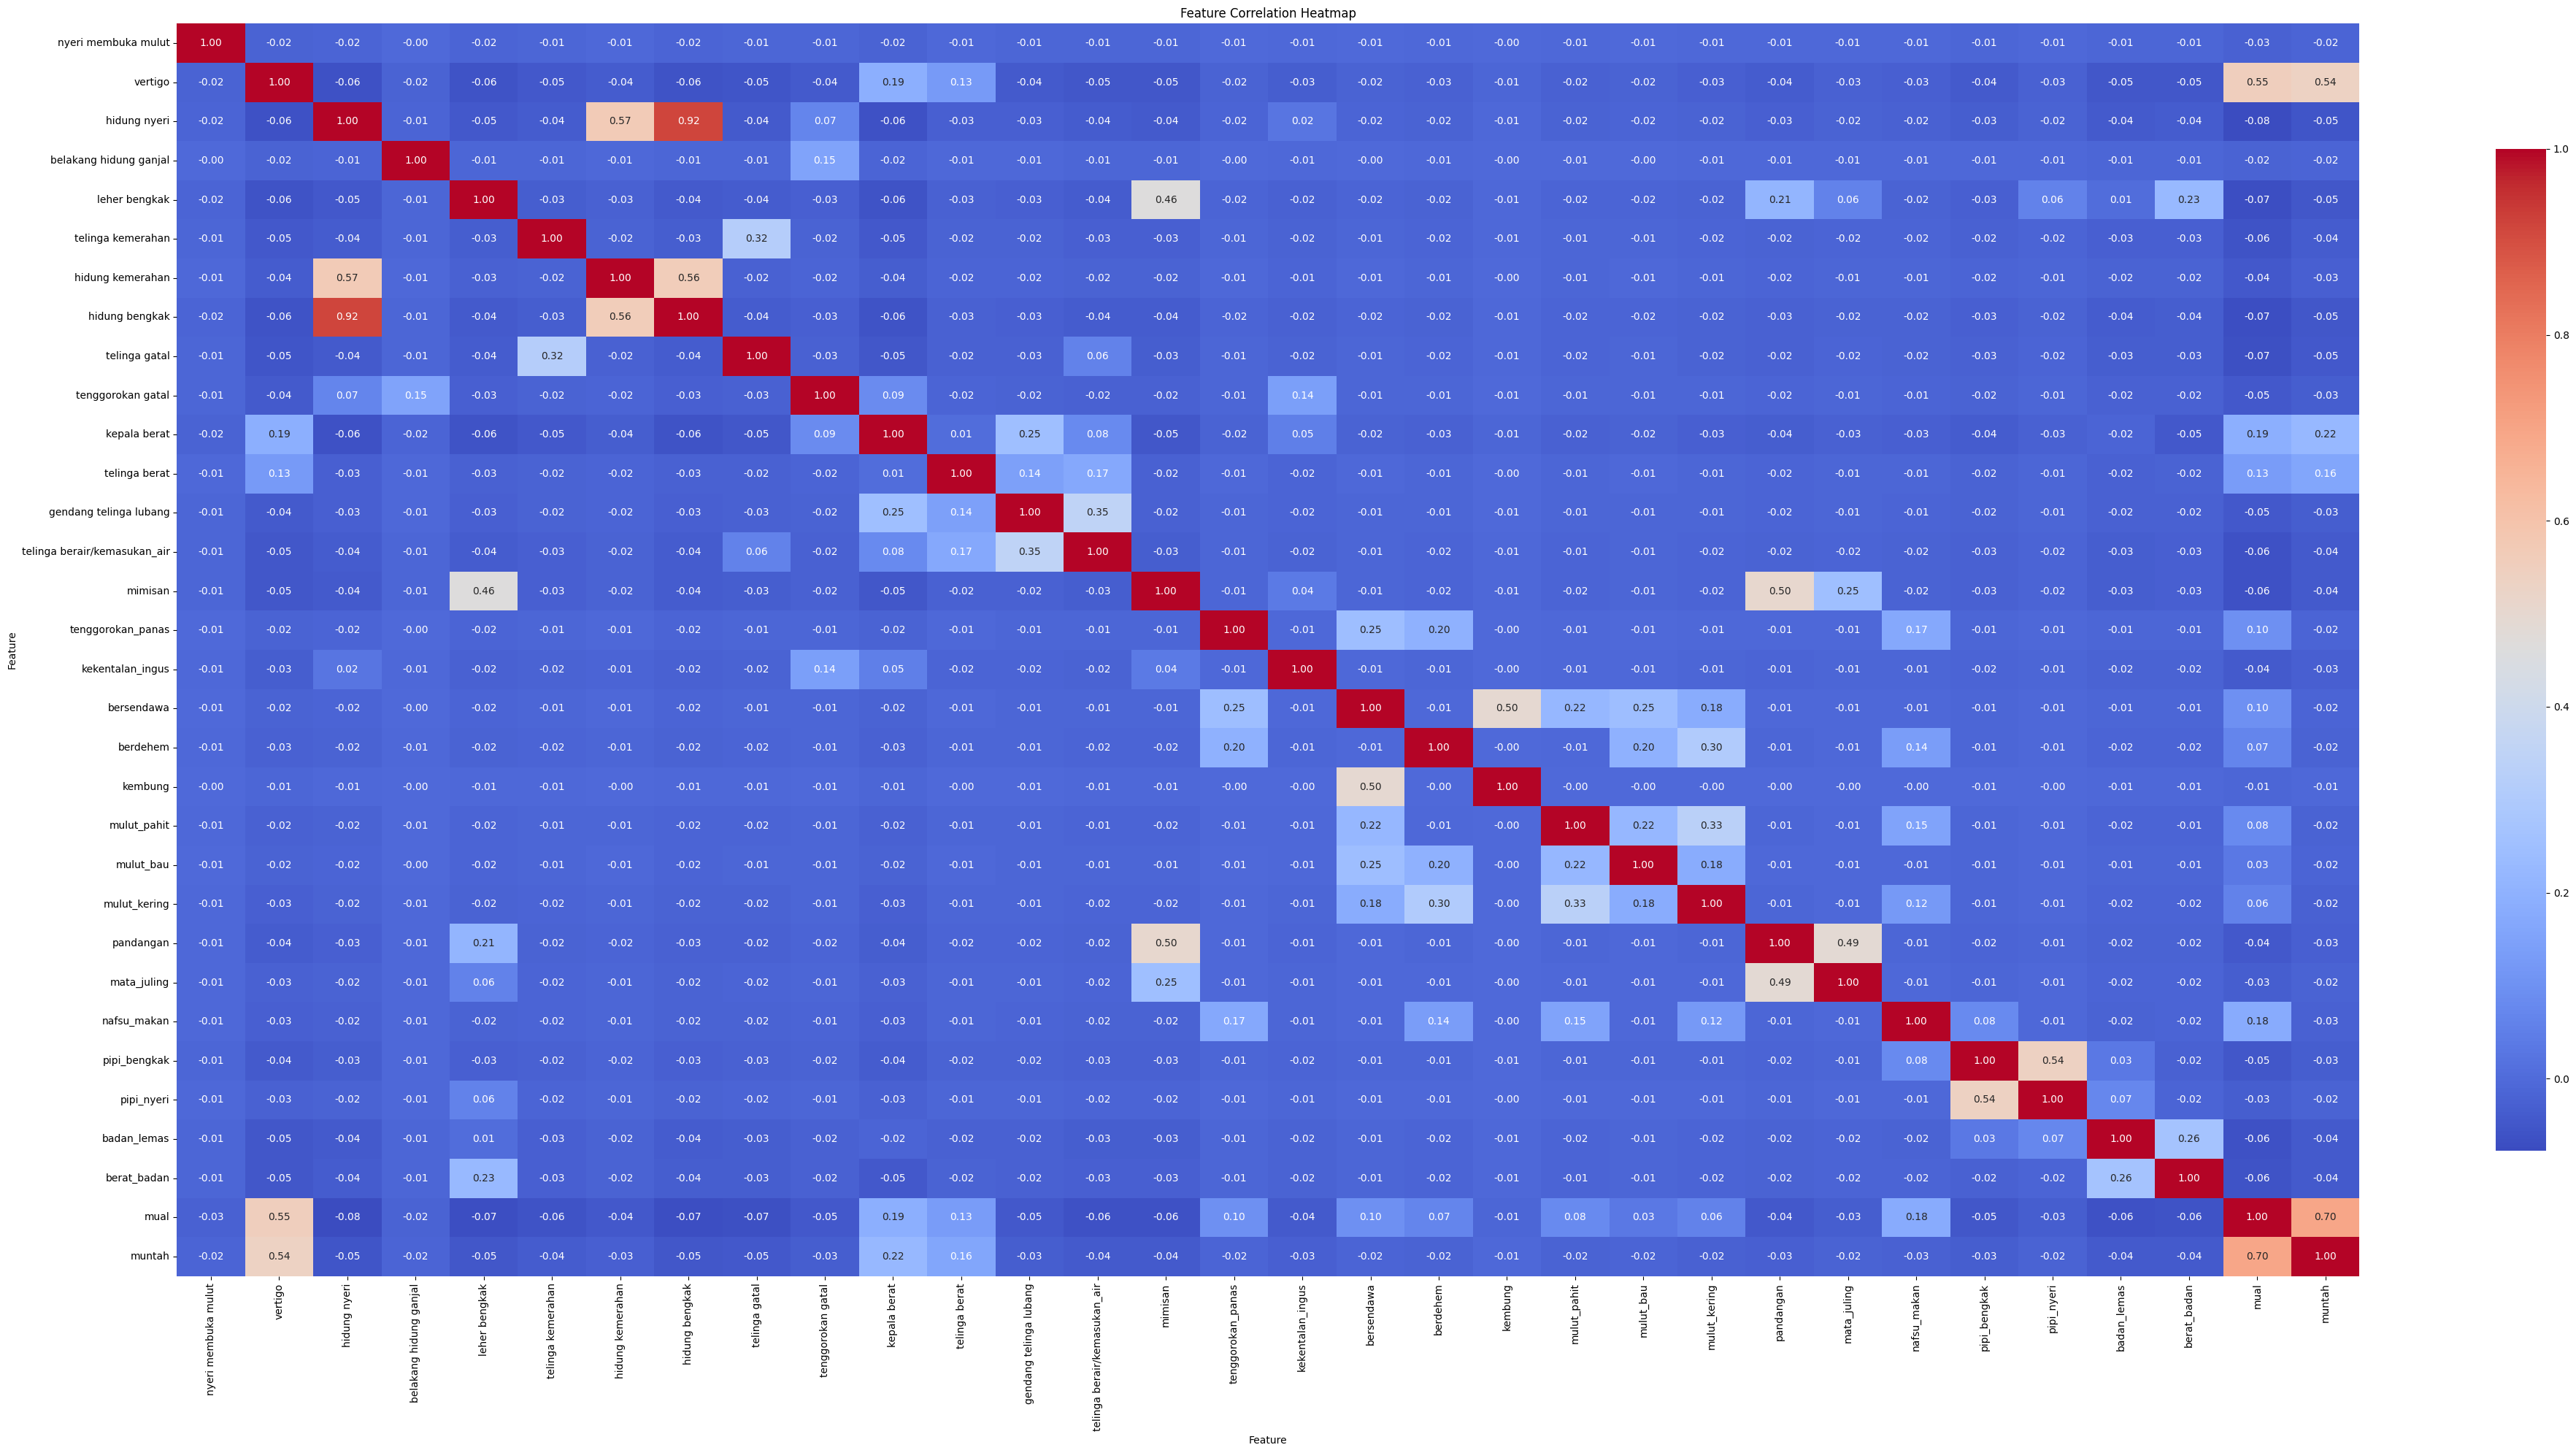

In [33]:
# Extracting feature names from the DataFrame
feature_names = vis_df.columns[:-1]  # Exclude the last column, which is the target variable

# Plotting feature correlation heatmap with wider size
plt.figure(figsize=(40, 20))  # Increase the figure width and height
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={"shrink": 0.8},
            xticklabels=feature_names, yticklabels=feature_names)
plt.title('Feature Correlation Heatmap')
plt.xlabel('Feature')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

In [34]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [35]:
Rforest = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=2, min_samples_leaf=1)
Rforest.fit(StratX_train3, Straty_train3)
Rforest.score(StratX_train3, Straty_train3)

0.40816326530612246

In [36]:
# akan memungkinkan tiap data untuk menampung nama dari data yang akan diuji satu persatu dengan tujuan untuk mengecek tiap akurasi data
filtered_df_list = []
for key, values in label_mapping.items():
    keyName = str(key)
    filtered_df = df[df['hasil_diagn_encoded'] == values]
    globals()['filtered_df_' + keyName] = filtered_df
    filtered_df_list.append('filtered_df_' + keyName)

In [37]:
#untuk akses datanya pakai attribut global juga
for df_name in filtered_df_list:
    print("Dataframe:", df_name)
    print(globals()[df_name])  # Access the dataframe using its name
    print()

Dataframe: filtered_df_barotrauma
     nyeri_membuka_mulut  vertigo  hidung_nyeri  blkng_hidng_ganjal  \
460                    0        0             0                   0   
461                    0        0             0                   0   
462                    0        0             0                   0   
463                    0        0             0                   0   
464                    0        0             0                   0   
465                    0        0             0                   0   
466                    0        0             0                   0   
467                    0        1             0                   0   
468                    0        1             0                   0   
469                    0        1             0                   0   
470                    0        0             0                   0   
471                    0        0             0                   0   
472                    0        0          

In [38]:
XFiltered_df = []
yFiltered_df = []
#untuk akses datanya pakai attribut global juga
for df_name in filtered_df_list:
    key = str(df_name)
    # Assuming the last column is the label/target column
    globals()['X_' + key] = globals()[df_name].drop("hasil_diagn_encoded", axis = 1)  # Features
    globals()['y_' + key] = globals()[df_name]['hasil_diagn_encoded']   # Labels
    XFiltered_df.append('X_' + key)
    yFiltered_df.append('y_' + key)

In [39]:
# hasil reverse value dengan key terhadap label_mapping
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

In [40]:
for XKey, yKey in zip(XFiltered_df, yFiltered_df):
    print('Data :', XKey)
    predicted_output = forest.predict(globals()[XKey])
    predicted_output_keys = [reverse_label_mapping[value] for value in predicted_output]
    print("Predicted Output : ", predicted_output_keys)  

Data : X_filtered_df_barotrauma
Predicted Output :  ['ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'barotrauma', 'barotrauma', 'barotrauma', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'sinusitis', 'perichondritis', 'ruptur_membran_timpani', 'meniere_disease', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'otisis_media_akut', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'sinusitis', 'ruptur_membran_timpani', 'otisis_eksterna', 'sinusitis', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'barotrauma']
Data : X_filtered_df_bppv
Predicted Output :  ['bppv', 'bppv', 'bppv', 'bppv', 'tonsilitsakut', 'bppv', 'barotrauma', 'bppv', 'bppv', 'bppv', 'tonsilitsakut', 'bppv', 'bppv', 'bppv', 'bppv', 'tonsilitsakut', 'barotrauma', 'ruptur_membran_timpani', 'bppv', 'meniere_disease', 'bppv'

In [41]:
for XKey, yKey in zip(XFiltered_df, yFiltered_df):
    print('Data :', XKey)
    predicted_output = forest3.predict(globals()[XKey])
    predicted_output_keys = [reverse_label_mapping[value] for value in predicted_output]
    print("Predicted Output : ", predicted_output_keys)  

Data : X_filtered_df_barotrauma
Predicted Output :  ['ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'barotrauma', 'barotrauma', 'barotrauma', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'sinusitis', 'perichondritis', 'ruptur_membran_timpani', 'meniere_disease', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'barotrauma', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'sinusitis', 'ruptur_membran_timpani', 'otisis_eksterna', 'sinusitis', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'barotrauma']
Data : X_filtered_df_bppv
Predicted Output :  ['bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'barotrauma', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'barotrauma', 'ruptur_membran_timpani', 'bppv', 'meniere_disease', 'bppv', 'bppv', 'barotrauma', 'bppv', 'b

c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without f

Predicted Output :  ['ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'ruptur_membran_timpani']
Data : X_filtered_df_rhinitis_akut
Predicted Output :  ['rhinitis_akut', 'rhinitis_akut', 'ruptur_membran_timpani', 'ruptur_membran_timpani', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'korpu

c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without f

In [42]:
for XKey, yKey in zip(XFiltered_df, yFiltered_df):
    print('Data :', XKey)
    predicted_output = Stratforest.predict(globals()[XKey])
    predicted_output_keys = [reverse_label_mapping[value] for value in predicted_output]
    print("Predicted Output : ", predicted_output_keys)  

Data : X_filtered_df_barotrauma
Predicted Output :  ['rhinitis_alergi', 'rhinitis_alergi', 'rhinitis_alergi', 'rhinitis_alergi', 'rhinitis_alergi', 'rhinitis_alergi', 'rhinitis_alergi', 'meniere_disease', 'meniere_disease', 'meniere_disease', 'rhinitis_alergi', 'rhinitis_alergi', 'sinusitis', 'perichondritis', 'rhinitis_alergi', 'bppv', 'rhinitis_alergi', 'rhinitis_alergi', 'rhinitis_alergi', 'otisis_media_kronis', 'rhinitis_alergi', 'rhinitis_alergi', 'sinusitis', 'rhinitis_alergi', 'otisis_eksterna', 'sinusitis', 'rhinitis_alergi', 'rhinitis_alergi', 'rhinitis_alergi', 'meniere_disease']
Data : X_filtered_df_bppv
Predicted Output :  ['bppv', 'bppv', 'bppv', 'bppv', 'tonsilitsakut', 'bppv', 'meniere_disease', 'bppv', 'bppv', 'bppv', 'tonsilitsakut', 'bppv', 'bppv', 'bppv', 'bppv', 'tonsilitsakut', 'meniere_disease', 'rhinitis_alergi', 'bppv', 'bppv', 'bppv', 'bppv', 'meniere_disease', 'bppv', 'bppv', 'bppv', 'bppv', 'meniere_disease', 'bppv', 'tonsilitsakut']
Data : X_filtered_df_fari

In [43]:
for XKey, yKey in zip(XFiltered_df, yFiltered_df):
    print('Data :', XKey)
    predicted_output = Stratforest3.predict(globals()[XKey])
    predicted_output_keys = [reverse_label_mapping[value] for value in predicted_output]
    print("Predicted Output : ", predicted_output_keys)  

Data : X_filtered_df_barotrauma
Predicted Output :  ['rhinitis_alergi', 'rhinitis_alergi', 'rhinitis_alergi', 'rhinitis_alergi', 'rhinitis_alergi', 'rhinitis_alergi', 'rhinitis_alergi', 'meniere_disease', 'meniere_disease', 'meniere_disease', 'rhinitis_alergi', 'rhinitis_alergi', 'sinusitis', 'otisis_eksterna', 'rhinitis_alergi', 'barotrauma', 'rhinitis_alergi', 'rhinitis_alergi', 'rhinitis_alergi', 'otisis_media_kronis', 'rhinitis_alergi', 'rhinitis_alergi', 'sinusitis', 'rhinitis_alergi', 'otisis_eksterna', 'sinusitis', 'rhinitis_alergi', 'rhinitis_alergi', 'rhinitis_alergi', 'meniere_disease']
Data : X_filtered_df_bppv
Predicted Output :  ['meniere_disease', 'meniere_disease', 'bppv', 'meniere_disease', 'tonsilitsakut', 'bppv', 'meniere_disease', 'bppv', 'bppv', 'meniere_disease', 'tonsilitsakut', 'bppv', 'bppv', 'meniere_disease', 'meniere_disease', 'tonsilitsakut', 'meniere_disease', 'rhinitis_alergi', 'laringofaringealreflux', 'barotrauma', 'laringofaringealreflux', 'bppv', 'meni

In [44]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [45]:
from sklearn.model_selection import KFold

# Assuming X contains your feature matrix and y contains your target variable

# Initialize a Random Forest classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)

# Define the number of folds for cross-validation
k_folds = 10

# Initialize the KFold cross-validation splitter
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform K-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Mean cross-validation score: {mean_cv_score:.2f}")
print(f"Standard deviation of cross-validation scores: {std_cv_score:.2f}")

Cross-validation scores: [0.32857143 0.37142857 0.31428571 0.41428571 0.34285714 0.35714286
 0.3        0.31428571 0.37142857 0.27142857]
Mean cross-validation score: 0.34
Standard deviation of cross-validation scores: 0.04


In [46]:
# Random Search Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 300, 500],     # Number of trees in random forest
    'max_depth': [10, 20, 30, 40, 50],    # Maximum number of levels in tree
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]  # Minimum number of samples required to split a node
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=Stratforest, param_distributions=param_dist,
                                   n_iter=50, cv=5, scoring='accuracy', random_state=40,
                                   n_jobs=-1)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)  # Replace X_train and y_train with your training data

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Print the best score found
print("Best Score:", random_search.best_score_)

# Convert cv_results_ to a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)


# Set display options to show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Display the parameters and their corresponding scores
print(results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])

Best Parameters: {'n_estimators': 100, 'min_samples_split': 3, 'max_depth': 50}
Best Score: 0.39107142857142857
                                                             params  \
0    {'n_estimators': 500, 'min_samples_split': 7, 'max_depth': 10}   
1    {'n_estimators': 300, 'min_samples_split': 3, 'max_depth': 40}   
2    {'n_estimators': 100, 'min_samples_split': 8, 'max_depth': 10}   
3    {'n_estimators': 100, 'min_samples_split': 3, 'max_depth': 50}   
4    {'n_estimators': 500, 'min_samples_split': 4, 'max_depth': 50}   
5    {'n_estimators': 500, 'min_samples_split': 8, 'max_depth': 20}   
6    {'n_estimators': 300, 'min_samples_split': 9, 'max_depth': 40}   
7    {'n_estimators': 500, 'min_samples_split': 2, 'max_depth': 50}   
8    {'n_estimators': 500, 'min_samples_split': 9, 'max_depth': 10}   
9    {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 50}   
10   {'n_estimators': 100, 'min_samples_split': 6, 'max_depth': 20}   
11   {'n_estimators': 500, 'min_samp

In [47]:
# Random Search Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 1000),  # Number of trees in random forest
    'max_features': ['auto', 'sqrt'],    # Number of features to consider at every split
    'max_depth': randint(10, 100),       # Maximum number of levels in tree
    'min_samples_split': randint(2, 10), # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 10)   # Minimum number of samples required at each leaf node
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=forest, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', random_state=42,
                                   n_jobs=-1)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)  # Replace X_train and y_train with your training data

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Print the best score found
print("Best Score:", random_search.best_score_)

Best Parameters: {'max_depth': 79, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 133}
Best Score: 0.3875


c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
265 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
172 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

In [48]:
# Random Search Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 1000),  # Number of trees in random forest
    'max_features': ['auto', 'sqrt'],    # Number of features to consider at every split
    'max_depth': randint(10, 100),       # Maximum number of levels in tree
    'min_samples_split': randint(2, 10), # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 10)   # Minimum number of samples required at each leaf node
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=forest, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', random_state=42,
                                   n_jobs=-1)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train3, y_train3)  # Replace X_train and y_train with your training data

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Print the best score found
print("Best Score:", random_search.best_score_)

c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
265 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
172 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

Best Parameters: {'max_depth': 58, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 229}
Best Score: 0.37551020408163266


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
# Compute evaluation metrics for each class
accuracy = accuracy_score(Straty_test, y_pred)
precision = precision_score(Straty_test, y_pred, average=None)
recall = recall_score(Straty_test, y_pred, average=None)
f1 = f1_score(Straty_test, y_pred, average=None)

c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
accuracy3 = accuracy_score(Straty_test3, y_pred3)
precision3 = precision_score(Straty_test3, y_pred3, average=None)
recall3 = recall_score(Straty_test3, y_pred3, average=None)
f13 = f1_score(Straty_test3, y_pred3, average=None)

c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
accuracy3

0.38095238095238093

In [52]:
precision3

array([0.        , 0.5       , 0.        , 0.875     , 1.        ,
       0.        , 0.        , 0.6       , 0.45454545, 0.        ,
       0.7       , 0.        , 1.        , 1.        , 1.        ,
       0.        , 0.44444444, 0.08256881, 0.        , 0.        ,
       0.625     , 0.33333333, 1.        ])

In [53]:
recall3

array([0.        , 0.11111111, 0.        , 0.77777778, 0.88888889,
       0.        , 0.        , 1.        , 0.55555556, 0.        ,
       0.77777778, 0.        , 0.44444444, 0.55555556, 0.66666667,
       0.        , 0.44444444, 1.        , 0.        , 0.        ,
       0.55555556, 0.1       , 1.        ])

In [54]:
f13

array([0.        , 0.18181818, 0.        , 0.82352941, 0.94117647,
       0.        , 0.        , 0.75      , 0.5       , 0.        ,
       0.73684211, 0.        , 0.61538462, 0.71428571, 0.8       ,
       0.        , 0.44444444, 0.15254237, 0.        , 0.        ,
       0.58823529, 0.15384615, 1.        ])

In [55]:
# Print evaluation metrics
print("Accuracy:", accuracy3)
print("Precision:", precision3)
print("Recall:", recall3)
print("F1 Score:", f13)

# Compute mean values
mean_accuracy = np.mean(accuracy3)
mean_precision = np.mean(precision3)
mean_recall = np.mean(recall3)
mean_f1_score = np.mean(f13)

# Print mean values
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1_score)

Accuracy: 0.38095238095238093
Precision: [0.         0.5        0.         0.875      1.         0.
 0.         0.6        0.45454545 0.         0.7        0.
 1.         1.         1.         0.         0.44444444 0.08256881
 0.         0.         0.625      0.33333333 1.        ]
Recall: [0.         0.11111111 0.         0.77777778 0.88888889 0.
 0.         1.         0.55555556 0.         0.77777778 0.
 0.44444444 0.55555556 0.66666667 0.         0.44444444 1.
 0.         0.         0.55555556 0.1        1.        ]
F1 Score: [0.         0.18181818 0.         0.82352941 0.94117647 0.
 0.         0.75       0.5        0.         0.73684211 0.
 0.61538462 0.71428571 0.8        0.         0.44444444 0.15254237
 0.         0.         0.58823529 0.15384615 1.        ]
Mean Accuracy: 0.38095238095238093
Mean Precision: 0.41803878433316016
Mean Recall: 0.38599033816425116
Mean F1 Score: 0.3653089027997483


In [56]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.4142857142857143
Precision: [0.         0.33333333 0.         1.         1.         0.
 0.         1.         0.4        0.         0.8        0.
 1.         1.         0.8        0.         0.66666667 0.08571429
 0.         0.         0.8        0.5        1.        ]
Recall: [0.         0.66666667 0.         1.         1.         0.
 0.         0.66666667 0.33333333 0.         0.66666667 0.
 0.5        0.66666667 0.66666667 0.         0.66666667 1.
 0.         0.         0.66666667 0.14285714 1.        ]
F1 Score: [0.         0.44444444 0.         1.         1.         0.
 0.         0.8        0.36363636 0.         0.72727273 0.
 0.66666667 0.8        0.72727273 0.         0.66666667 0.15789474
 0.         0.         0.72727273 0.22222222 1.        ]


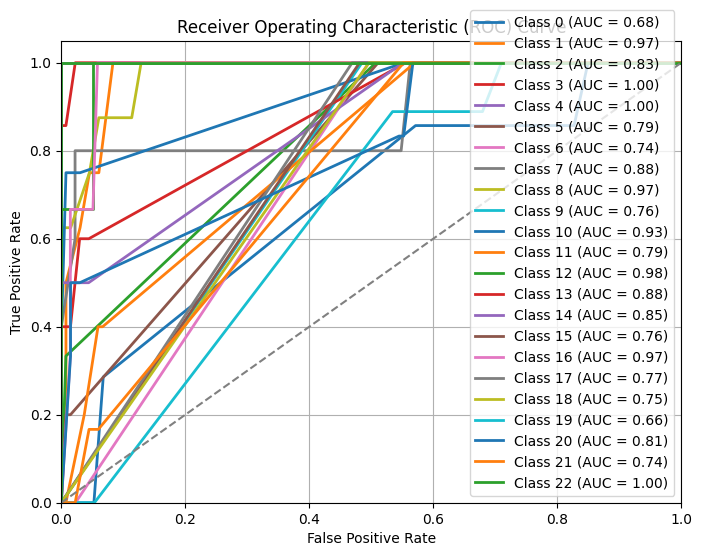

In [57]:
# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), forest.predict_proba(X_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

